# Plot Vault Share Prices

This notebook plots the share prices of three vaults:
1. Moonwell
2. Gauntlet
3. Re7

We'll look at their price evolution over the past week with 12-hour intervals.

In [5]:
# Import required libraries
import sys
sys.path.append('../src')

from fetcher import Fetcher
from config import VAULTS
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Set plot style to a clean, modern look
plt.style.use('classic')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['grid.alpha'] = 0.3

In [7]:
# Initialize fetchers for each vault
fetchers = {
    'Moonwell': Fetcher(VAULTS['Moonwell']),
    'Gauntlet': Fetcher(VAULTS['Gauntlet']),
    'Re7': Fetcher(VAULTS['Re7'])
}

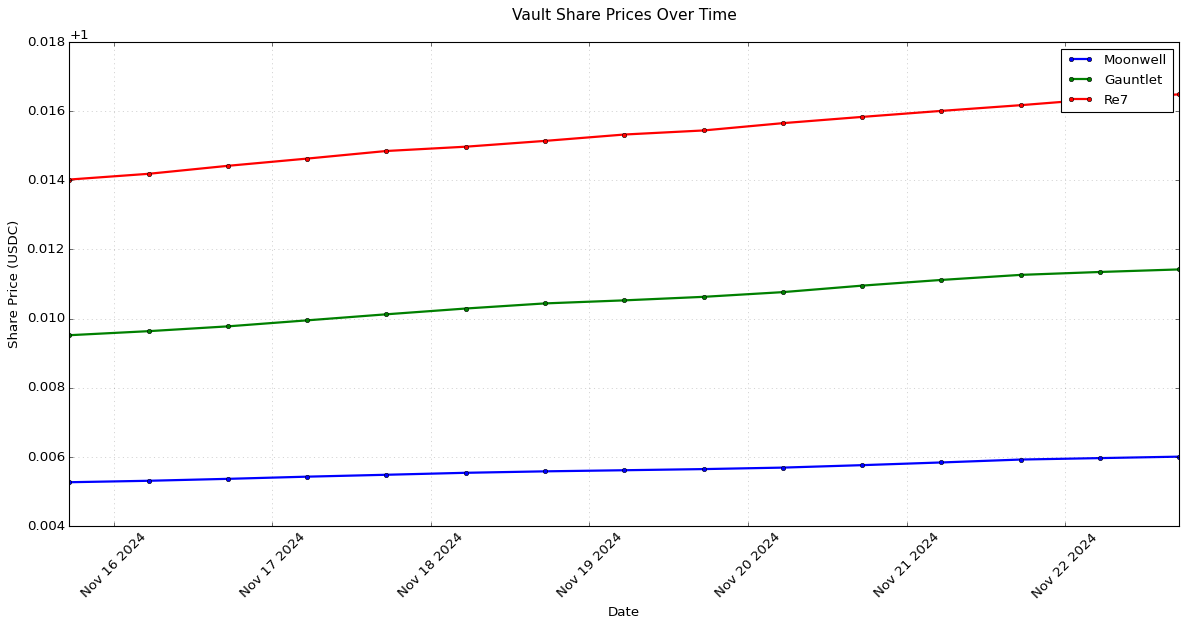

In [8]:
# Set time range (last 7 days)
end_date = datetime.now()
start_date = end_date - timedelta(days=7)

# Create figure
plt.figure(figsize=(15, 8))

# Plot each vault
for name, fetcher in fetchers.items():
    df = fetcher.fetch_prices(start_date, end_date, interval_hours=12)
    plt.plot(df['timestamp'], df['price'], label=name, linewidth=2, marker='o', markersize=4)

# Customize plot
plt.title('Vault Share Prices Over Time', fontsize=14, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Share Price (USDC)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [9]:
# Calculate and display APY for each vault
print("24-hour APY for each vault:")
for name, fetcher in fetchers.items():
    df = fetcher.fetch_prices(end_date - timedelta(days=1), end_date)
    start_price = df['price'].iloc[0]
    end_price = df['price'].iloc[-1]
    
    # Calculate APY
    apy = ((end_price / start_price) ** 365 - 1) * 100
    print(f"{name}: {apy:.2f}%")

24-hour APY for each vault:
Moonwell: 3.09%
Gauntlet: 5.87%
Re7: 11.90%
